In [1]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

print(f"TF version: {tf.__version__}")

TF version: 2.7.0


In [2]:
#Model Functions - from simple to a little more complex
#  each model receives the coordinates of a sample and returns it's class
#  optionaly receives a parameter r used to modify in some way the model

#Almost trivial: class positive if X is positive
def positivos(x, y, r=0):
    return x > r 

#Simple linear: positive if Y > than X 
def linear(x, y):
    return y > x

#A circle: positive if (x,y) is inside a circle of radius r
def circle(x, y, r=0.75):
    return x*x + y*y < r*r

#A ring: positive if (x,y) is inside of a circle of radius r but outside an inner circle or radius r/2
def ring(x, y, r=0.75):
    return (x*x + y*y < r*r) and (x*x + y*y > (r/2)*(r/2))

#A cosine: positive if (x,y) is above a cosine of frequency r
def cos(x, y, r=8):
    return (y) - (math.cos(r*x)) > 0 

#A polar cosine ("rose of n-petals"): Positive if (x,y) is inside the "rose"
def polar(x, y, r=4):
    rr = math.sqrt(x*x + y*y)
    th = math.atan(y / x)
    return rr < math.sin(r * th)

In [3]:
def plot_predictions(points, labels, val_points, val_labels, val_predictions, title=""):
    train_col = ("#add8e6","#4682b4")
    pred_col = ("#ff0000", "#888888")

    plt.figure(figsize=(10,10), dpi=80)
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    p = tf.transpose(points)
    vp = tf.transpose(val_points)

    plt.scatter(p[0], p[1], c=[train_col[i] for i in labels], 
                s=20, alpha=0.7, marker=".", edgecolors="face")
    plt.scatter(vp[0], vp[1], c=[pred_col[i] for i in val_predictions == val_labels], 
                alpha=0.3,marker="o",edgecolors="none")

In [4]:
#Parameters
data_function = circle
train_size = 10000
val_size = 2000
mlp_units = [2, 2]
epochs = 20
batch_size = 10

points = tf.random.uniform([train_size, 2], -1, 1, dtype=tf.dtypes.float32)
labels = tf.convert_to_tensor([data_function(*e) for e in points.numpy()])

val_points = tf.random.uniform([val_size, 2], -1, 1, dtype=tf.dtypes.float32)
val_labels = tf.convert_to_tensor([data_function(*e) for e in val_points.numpy()])

#This one of the weird thing in TF: the following line takes 14s in Colab, impossible to run in Mac M1
#  for train_size = 10000. 
# Converting to numpy array makes it in < 1s
#labels = tf.convert_to_tensor([data_function(*e) for e in points])

Metal device set to: Apple M1


2022-07-15 18:01:21.497605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-15 18:01:21.497798: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
def build_model(input_shape, dense_layers, activation="relu"):
    inputs = layers.Input(input_shape, name="INPUT")
    x = inputs
    for index, layer_units in enumerate(dense_layers):
        x = layers.Dense(layer_units, activation=activation, name=f"DENSE_{index}")(x)
    outputs = layers.Dense(1, "sigmoid", name="OUTPUT")(x)
    return keras.Model(inputs, outputs)

model = build_model([2], mlp_units)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 2)]               0         
                                                                 
 DENSE_0 (Dense)             (None, 2)                 6         
                                                                 
 DENSE_1 (Dense)             (None, 2)                 6         
                                                                 
 OUTPUT (Dense)              (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics="accuracy")

model.fit(x=points, 
          y=labels, 
          validation_data=(val_points, val_labels),
          epochs=epochs, 
          batch_size=batch_size)

Epoch 1/20


2022-07-15 18:01:21.620121: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-15 18:01:21.734735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 994/1000 [============================>.] - ETA: 0s - loss: 0.6733 - accuracy: 0.5510

2022-07-15 18:01:25.966243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 5s 5ms/step - loss: 0.6730 - accuracy: 0.5511 - val_loss: 0.6450 - val_accuracy: 0.5645
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6208 - accuracy: 0.5875 - val_loss: 0.5903 - val_accuracy: 0.6690
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5653 - accuracy: 0.6857 - val_loss: 0.5404 - val_accuracy: 0.7030
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5251 - accuracy: 0.7232 - val_loss: 0.5127 - val_accuracy: 0.7345
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5014 - accuracy: 0.7383 - val_loss: 0.4940 - val_accuracy: 0.7465
Epoch 6/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4869 - accuracy: 0.7471 - val_loss: 0.4825 - val_accuracy: 0.7490
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4768 - accuracy: 0.7545 - val_loss: 0.4746 - val_accuracy: 0.7535
Epo

In [7]:
model.evaluate(val_points, val_labels)

28/63 [============>.................] - ETA: 0s - loss: 0.4293 - accuracy: 0.7824

2022-07-15 18:02:51.583233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 4ms/step - loss: 0.4296 - accuracy: 0.7855


[0.4295767545700073, 0.7855000495910645]

In [8]:
x = labels.numpy()
print(f"Baseline: {(len(x) - sum(x)) / len(x)}")

Baseline: 0.5539


2022-07-15 18:02:51.931247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


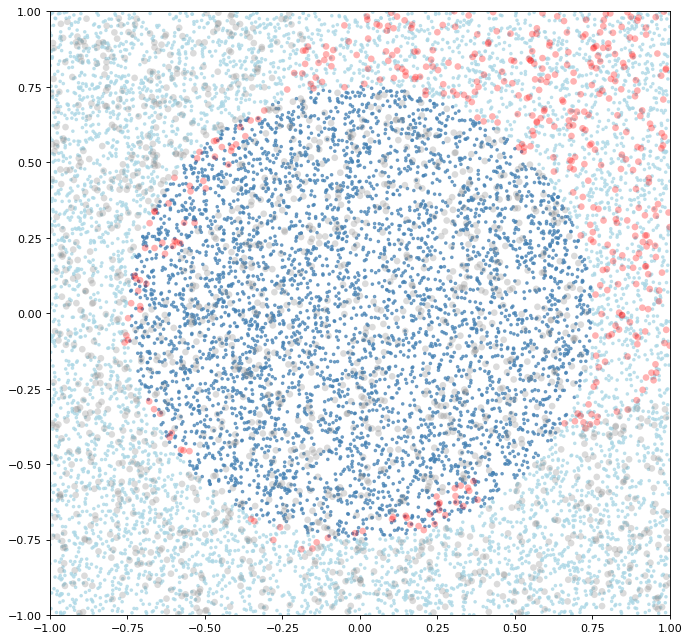

In [9]:
val_predictions = tf.reshape([v > 0.5 for v in model.predict(val_points)], (-1))
plot_predictions(points, labels, val_points, val_labels, val_predictions)

In [12]:
model.layers[1].weights

[<tf.Variable 'DENSE_0/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.48825324, -1.6645659 ],
        [ 1.0719848 ,  0.63575643]], dtype=float32)>,
 <tf.Variable 'DENSE_0/bias:0' shape=(2,) dtype=float32, numpy=array([1.0424219 , 0.08634252], dtype=float32)>]